<a href="https://colab.research.google.com/github/sujayrittikar/AudioSignalProcessing/blob/main/RMSE_ZCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load audio files
debussy_file = 'debussy.wav'
redhot_file = 'redhot.wav'
duke_file = 'duke.wav'

debussy, sr = librosa.load(debussy_file)
redhot, _sr = librosa.load(redhot_file)
duke, __sr = librosa.load(duke_file)

In [3]:
# Extract RMSE with librosa
FRAME_SIZE = 1024
HOP_LENGTH = 512

rms_debussy = librosa.feature.rms(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [4]:
rms_debussy.shape

(1292,)

(-1.0, 1.0)

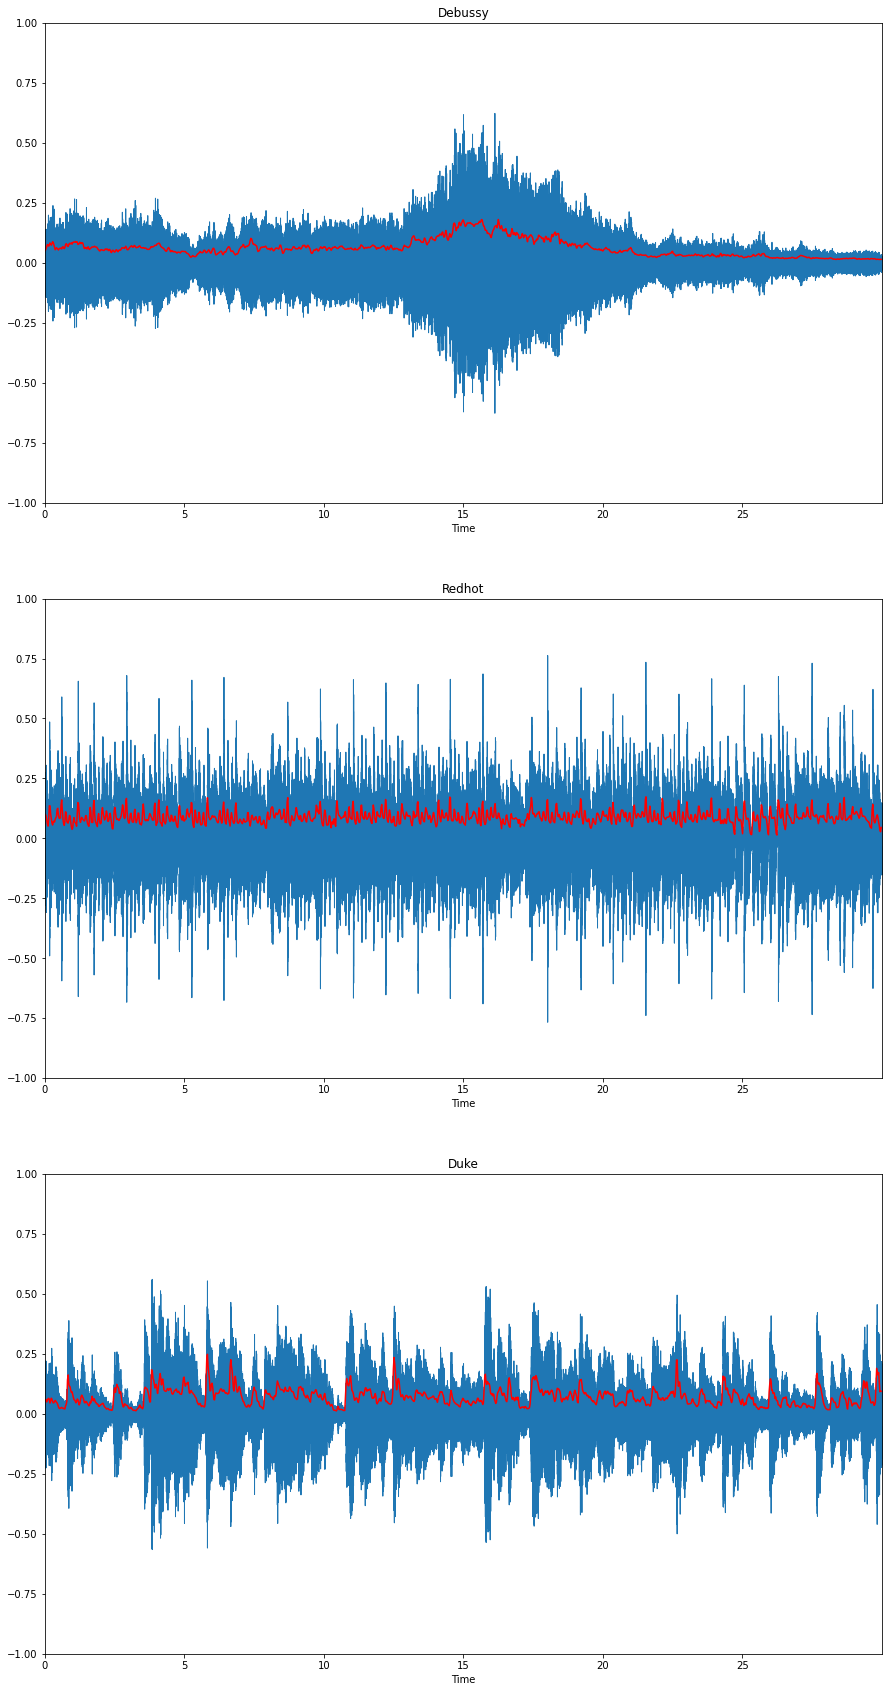

In [5]:
# Visualize the Amplitude Envelope for all audio files

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 30))

plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy)
plt.plot(t, rms_debussy, color="r")
plt.title("Debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot)
plt.plot(t, rms_redhot, color="r")
plt.title("Redhot")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke)
plt.plot(t, rms_duke, color="r")
plt.title("Duke")
plt.ylim((-1, 1))

In [6]:
def rms(signal, frame_length, hop_length):
  rmse = []

  for i in range(0, len(signal), hop_length):
    rms_current_frame = np.sqrt(np.sum(signal[i: i+frame_length]**2)/frame_length)
    rmse.append(rms_current_frame)
  return np.array(rmse)

In [7]:
rms1_debussy = rms(debussy, FRAME_SIZE, HOP_LENGTH)
rms1_redhot = rms(redhot, FRAME_SIZE, HOP_LENGTH)
rms1_duke = rms(duke, FRAME_SIZE, HOP_LENGTH)

(-1.0, 1.0)

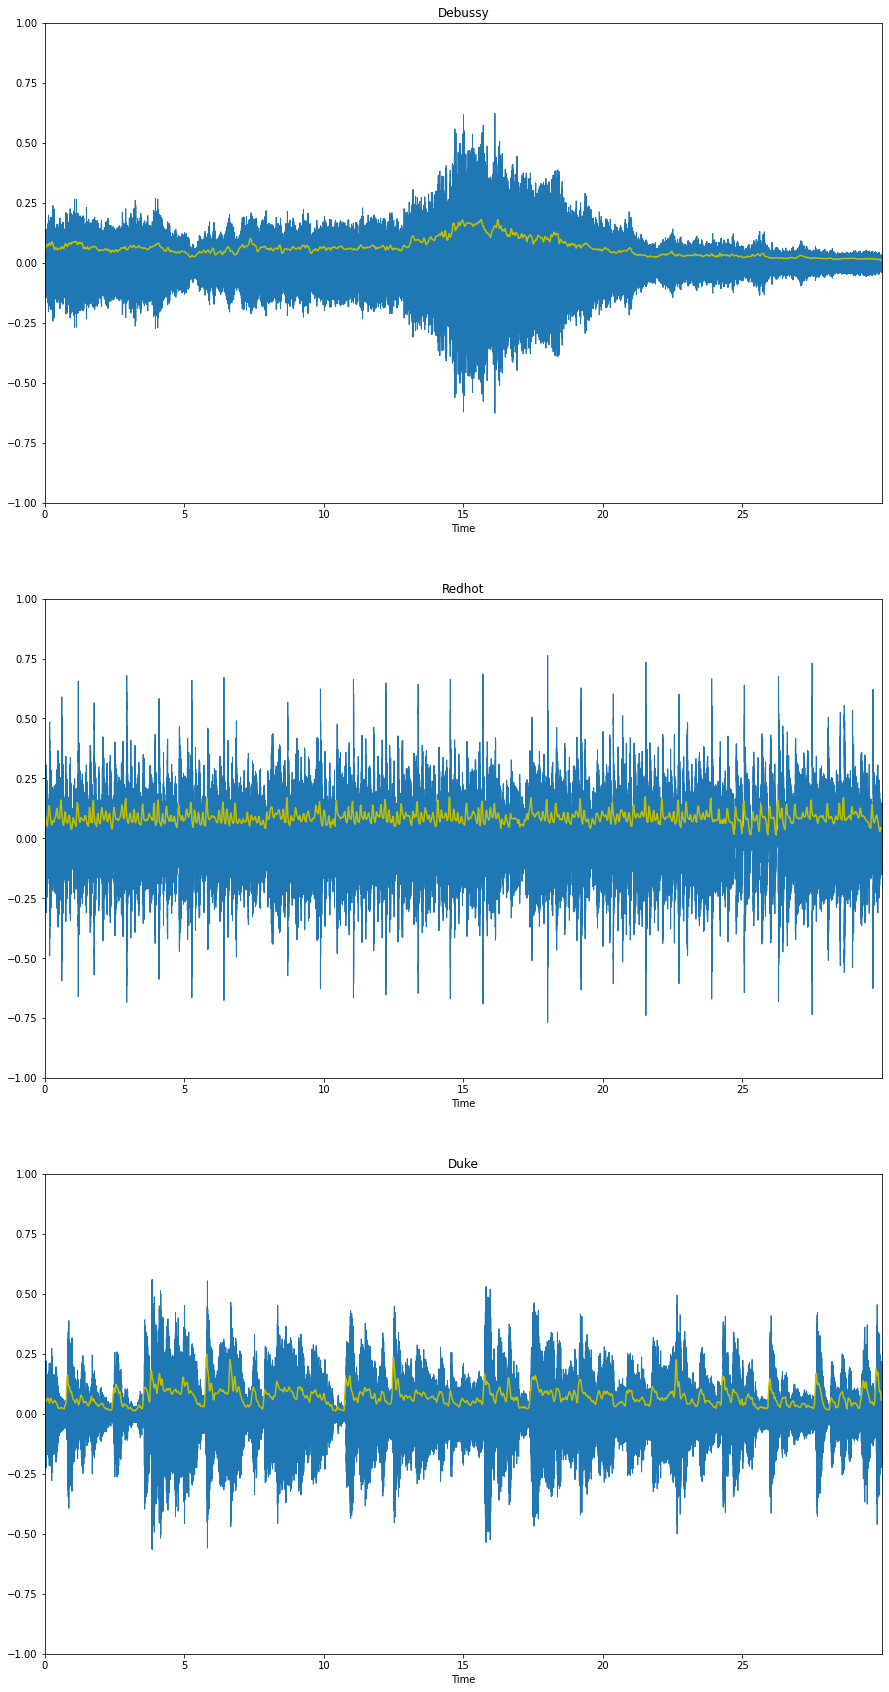

In [8]:
# Visualize the Amplitude Envelope for all audio files

frames = range(0, rms1_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 30))

plt.subplot(3, 1, 1)
librosa.display.waveplot(debussy)
plt.plot(t, rms1_debussy, color="y")
plt.title("Debussy")
plt.ylim((-1, 1))

plt.subplot(3, 1, 2)
librosa.display.waveplot(redhot)
plt.plot(t, rms1_redhot, color="y")
plt.title("Redhot")
plt.ylim((-1, 1))

plt.subplot(3, 1, 3)
librosa.display.waveplot(duke)
plt.plot(t, rms1_duke, color="y")
plt.title("Duke")
plt.ylim((-1, 1))

In [12]:
# Zero-crossing rate
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

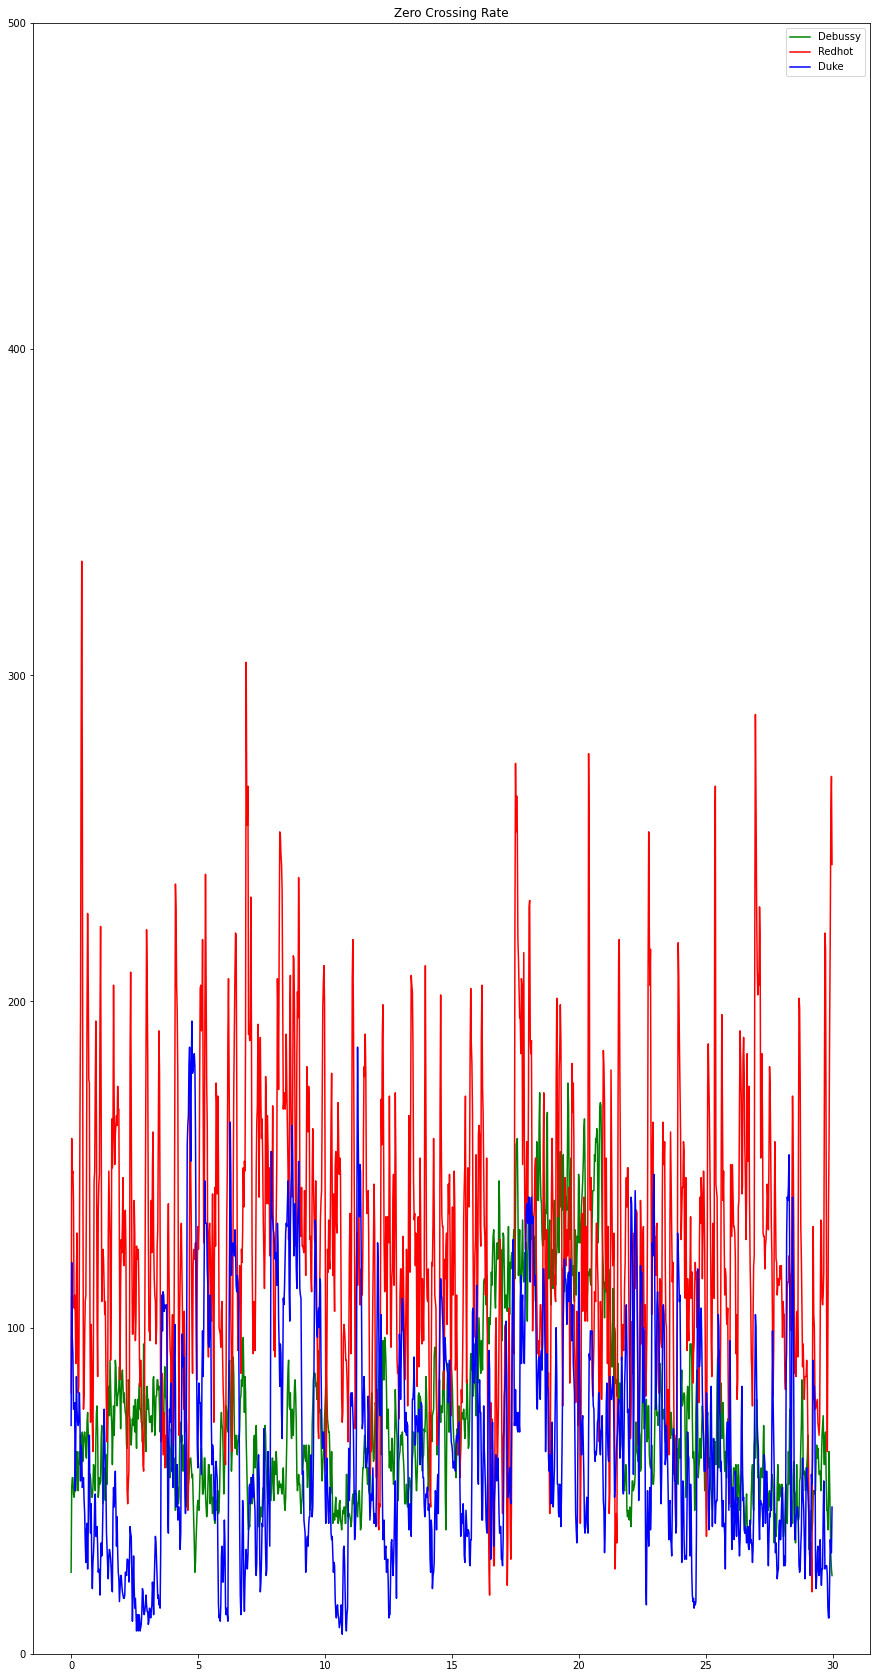

In [15]:
# Visualize the ZCR
frames = range(0, zcr_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 30))
plt.plot(t, zcr_debussy*FRAME_SIZE, color="g")
plt.plot(t, zcr_redhot*FRAME_SIZE, color="r")
plt.plot(t, zcr_duke*FRAME_SIZE, color="b")
plt.ylim(0, 500)
plt.title("Zero Crossing Rate")
plt.legend(["Debussy", "Redhot", "Duke"])
plt.show()